# SVM Initial Classifier

This shows a similar output as 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs

In [5]:
x_row = np.load('output/random_aggr_450.npy')
x_random = np.load('output/row_aggr_450.npy')

X = np.append(x_row[:450], x_random, axis=0).reshape(900, 49)
y = np.append(np.ones(450) * -1, np.ones(450))

print(X.shape, y.shape)

(900, 49) (900,)


In [53]:
# hanna's kernal function
# φ(x,μ)=exp[–||x–μ||2 /σ2 ]
#
# def my_kernel(x, mu):
#     sigma = 5
#     return np.exp(-np.square(-np.linalg.norm(x - mu)) / np.square(sigma))

# -- using the default RBF kernel
model = svm.SVC()
model.fit(X, y)
print('SVM uses', model.kernel, 'kernel.')

SVM uses rbf kernel.


In [49]:
y_pred = model.predict(X)

err = 0
for i, pred in enumerate(y_pred):
    if pred != y[i]:
        err += 1

print(f"Error: {err / len(y)}")

Error: 0.0022222222222222222


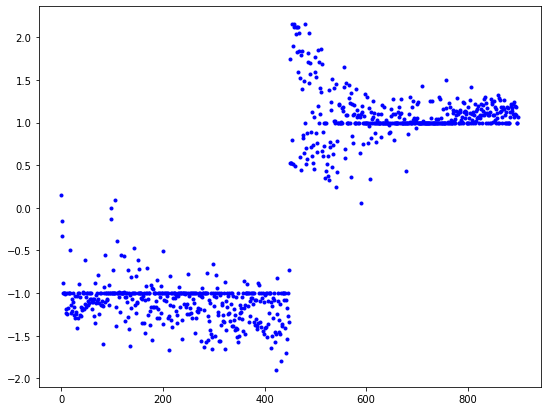

In [50]:
y_decision = model.decision_function(X)

fig, ax = plt.subplots(1, 1, figsize=(9,7))
ax.scatter(np.arange(0, len(y)), y_decision, marker='.', c="b")

plt.show()